# Credit Card Fraud Detection

In [1]:
!python --version

Python 3.9.12


In [2]:
import numpy as np 
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Data

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    50000 non-null  int64  
 1   V1      50000 non-null  float64
 2   V2      50000 non-null  float64
 3   V3      50000 non-null  float64
 4   V4      50000 non-null  float64
 5   V5      50000 non-null  float64
 6   V6      50000 non-null  float64
 7   V7      50000 non-null  float64
 8   V8      50000 non-null  float64
 9   V9      50000 non-null  float64
 10  V10     50000 non-null  float64
 11  V11     50000 non-null  float64
 12  V12     50000 non-null  float64
 13  V13     50000 non-null  float64
 14  V14     50000 non-null  float64
 15  V15     50000 non-null  float64
 16  V16     50000 non-null  float64
 17  V17     50000 non-null  float64
 18  V18     50000 non-null  float64
 19  V19     50000 non-null  float64
 20  V20     50000 non-null  float64
 21  V21     50000 non-null  float64
 22

In [6]:
df.Class.value_counts()

'0'    49852
'1'      148
Name: Class, dtype: int64

In [7]:
df['Class'] = df['Class'].str.strip("'")
df['Class'] = df['Class'].astype(int)
df.Class

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Class, Length: 50000, dtype: int32

In [8]:
cols =df[["Amount","Time","Class"]]
cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,50000.0,93.266587,253.010040,0.0,7.6275,25.0,85.25,12910.93
Time,50000.0,28923.779620,13116.563925,0.0,21893.5000,33471.5,38983.00,44299.00
Class,50000.0,0.002960,0.054326,0.0,0.0000,0.0,0.00,1.00


# Data Visualisation

In [9]:
corr = df.corr()
corr.style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.005040,-0.108712,-0.059476,-0.033532,-0.075928,-0.003909,-0.009607,0.041738,-0.338378,0.100028,-0.207407,0.419544,-0.356931,-0.274649,0.142113,-0.000743,-0.117642,-0.039396,0.027560,0.010891,0.018924,0.046496,-0.003003,-0.008525,0.036768,-0.025444,-0.019150,0.000537,0.077115,-0.008502
V1,-0.005040,1.000000,-0.047984,0.300577,-0.098788,0.090149,0.104086,0.161903,-0.094999,-0.031655,0.054361,-0.031673,0.047870,0.007076,0.130973,0.046194,0.105900,0.115569,0.027716,-0.003862,-0.057779,-0.048796,-0.026575,-0.073730,-0.010668,0.169704,0.025669,-0.062771,0.084753,-0.233550,-0.214535
V2,-0.108712,-0.047984,1.000000,-0.195304,0.097657,-0.110306,-0.008276,-0.066962,0.079991,-0.014660,-0.029187,0.072111,-0.114095,0.056089,-0.058312,0.051981,-0.047930,-0.096604,-0.030168,-0.001535,-0.094519,0.005728,-0.062259,-0.012754,-0.019942,-0.090912,-0.037697,0.066688,-0.072129,-0.531425,0.181826
V3,-0.059476,0.300577,-0.195304,1.000000,-0.142030,0.300584,-0.009282,0.330352,-0.271422,0.165180,0.204582,-0.126084,0.133762,-0.023165,0.202459,-0.170217,0.035125,0.200052,0.057867,-0.044972,-0.095527,-0.001075,0.237380,0.056195,0.020846,-0.183619,0.051697,-0.123828,0.039547,-0.190289,-0.400557
V4,-0.033532,-0.098788,0.097657,-0.142030,1.000000,-0.053672,-0.053064,-0.093584,0.089046,-0.003134,-0.119132,0.041735,-0.067127,0.015093,-0.066584,-0.087685,-0.144801,-0.043244,-0.053020,-0.004681,0.029083,0.014922,0.011451,-0.008508,-0.008127,-0.007718,0.012255,0.053639,0.003099,0.091509,0.223947
V5,-0.075928,0.090149,-0.110306,0.300584,-0.053672,1.000000,0.074201,0.053908,-0.110453,0.066392,0.153479,-0.049658,0.052308,0.048293,0.090446,0.081612,0.143555,0.071499,0.098129,0.005350,-0.041039,-0.065256,-0.063641,0.028559,-0.014564,-0.031838,-0.040594,-0.088851,0.053902,-0.385638,-0.209181
V6,-0.003909,0.104086,-0.008276,-0.009282,-0.053064,0.074201,1.000000,0.106949,-0.056661,0.046713,0.028248,-0.102678,0.023489,0.005649,0.056875,-0.113620,0.008821,0.034516,0.053732,0.081297,0.022419,0.032839,0.023111,-0.018956,0.010946,0.051925,0.012879,-0.009237,-0.049192,0.214412,-0.099140
V7,-0.009607,0.161903,-0.066962,0.330352,-0.093584,0.053908,0.106949,1.000000,-0.150378,0.076751,0.165647,-0.092770,0.165739,-0.011229,0.108097,0.066898,0.150613,0.169413,0.113044,-0.059787,0.053741,-0.047869,-0.011881,0.079855,-0.004187,-0.109872,-0.038302,-0.119186,-0.064204,0.361940,-0.337690
V8,0.041738,-0.094999,0.079991,-0.271422,0.089046,-0.110453,-0.056661,-0.150378,1.000000,-0.072898,-0.139111,0.015155,-0.070126,-0.014705,-0.065691,-0.033858,-0.076628,-0.092973,-0.044803,0.026149,0.035762,-0.042381,0.034392,-0.031829,0.004997,0.028178,0.002077,0.042709,0.046008,-0.089030,0.164092
V9,-0.338378,-0.031655,-0.014660,0.165180,-0.003134,0.066392,0.046713,0.076751,-0.072898,1.000000,-0.018793,0.042805,-0.162643,0.153932,0.212442,-0.180915,-0.029443,0.208531,0.067025,-0.027982,0.009534,-0.026268,0.019546,-0.036907,0.006579,0.105675,0.094329,-0.039370,-0.023481,-0.022452,-0.166512


<AxesSubplot:xlabel='Class', ylabel='count'>

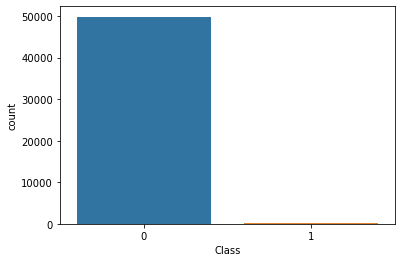

In [10]:
sns.countplot(data = df, x='Class')

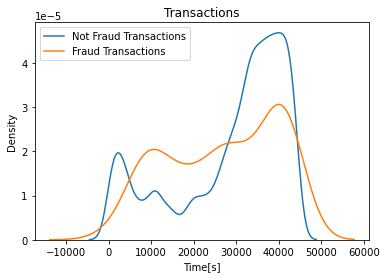

In [11]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

sns.kdeplot(data=class_0, label="Not Fraud Transactions", shade=False)
sns.kdeplot(data=class_1, label="Fraud Transactions", shade=False)
plt.xlabel("Time[s]")
plt.ylabel("Density")
plt.title("Transactions")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

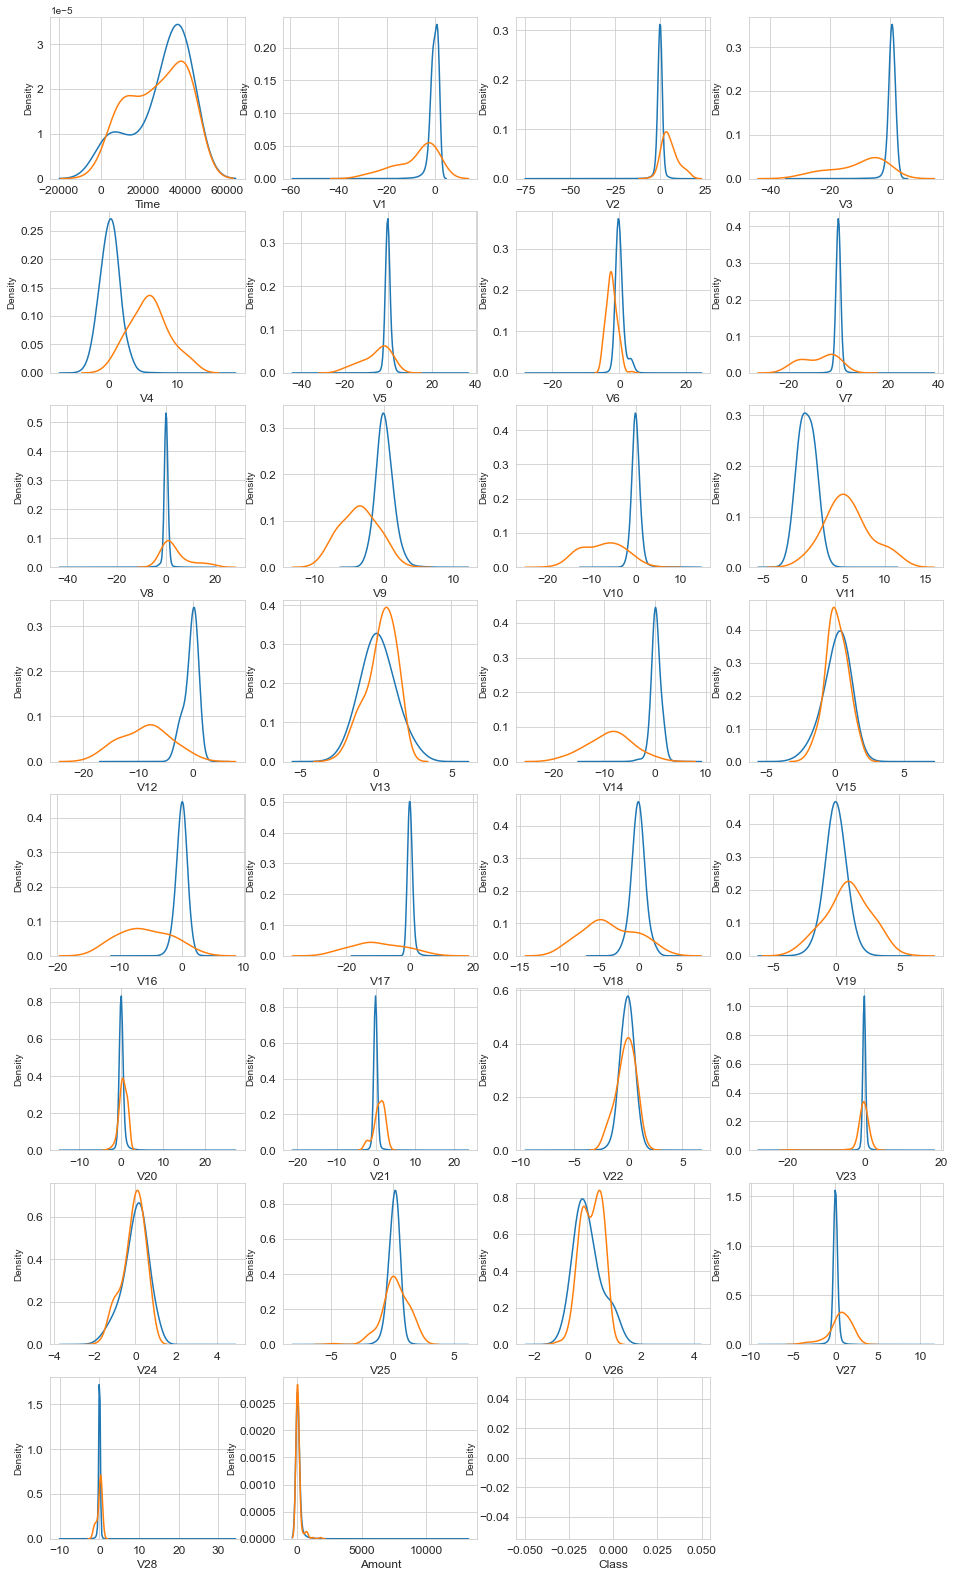

In [12]:
var = df.columns.values
i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,5,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# Analysis

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [14]:
X = df.drop('Class', axis=1)
y = df.Class

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=40),
}

In [16]:
print('Result of different ML Models are:')
print(' ')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print('-x' * 15)
    print(' ')

Result of different ML Models are:
 
Logistic Regression Metrics:
Accuracy: 1.00
Precision: 0.82
Recall: 0.70
F1-score: 0.76
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
 
Decision Tree Metrics:
Accuracy: 1.00
Precision: 0.89
Recall: 0.85
F1-score: 0.87
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
 
Random Forest Metrics:
Accuracy: 1.00
Precision: 0.97
Recall: 0.93
F1-score: 0.95
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
 


Therefore all these models(Logistic Regression, Desicion Tree and Random forest) indentifies the the fraud transaction accurately. 